In [1]:
import csv
import datetime
import os
import math
import geojson
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dir_path = r'P:/11202200.005-kpp-cip2018/data/'
file_path = os.path.join(dir_path,'water_level_data/')
# os.chdir(dir_path)
# locations available at http://matroos.deltares.nl/timeseries/search/
lon = [6.9338, 3.8604, 5.4098, 5.7609, 5.3335]
lat = [53.3275, 51.8638, 53.1767, 53.4311, 53.4436]
buoy = ['delfzij', 'haringvliet_10', 'harlingen', 'nes', \
        'terschelling_noordzee']
numfile = len(buoy)

In [3]:
for b in buoy:
    b = pd.read_csv(os.path.join(file_path, b+'_L8_S2_overlap'+'.csv'), sep=',')
    b['MISSION'] = b['MISSION'].replace(np.nan, 'L8', regex=True)
    # nes['system:time_start'] = nes['system:time_start'].astype(float)
    b['system:time_start'] = pd.to_datetime(b['system:time_start'],unit='ms')
    # nes['system:time_start'] = pd.Timestamp.fromtimestamp(nes['system:time_start'])
    s2 = b.loc[nes['MISSION'] == 'S2']
    l8 = b.loc[nes['MISSION'] == 'L8']
    # nes.head(n=5)
    # s2.head(n=5)
    l8.head(n=5)
    print(len(b))
    
    # df = pd.DataFrame(columns=['filename','system:time_start'])
    df = pd.read_csv(os.path.join(file_path,b+'.csv'), sep=',')
    df['Time'] = pd.to_datetime(df['Time'],format='%Y-%m-%d %H:%M:%S')
    df.head(n=5)
    
    plt.rcParams.update(params)
    # plt.figure(figsize=(20,10))
    # plt.plot(df['Time'], df['WaterLevel'])
    # plt.show()
    ax = df.plot(x = 'Time', y = 'WaterLevel', figsize = (20,10), style='silver')
    l8.plot(ax=ax, x = 'system:time_start', y = 'waterlevel', style='ro')
    s2.plot(ax=ax, x = 'system:time_start', y = 'waterlevel', style='bo')
    plt.xlabel('Date', fontsize=16)
    plt.ylabel('Water Level [m]', fontsize=16)
    plt.legend(['Nes buoy water level', 'Landsat 8 observation', 'Sentinel 2 observation'])
    plt.show()
    fig = ax.get_figure()
    fig.savefig(os.path.join(file_path,buoy[3]+'_L8_S2_overlap.png'))
    plt.close(fig) 

95


,Time,WaterLevel
0,2015-01-05 17:00:00,-0.39
1,2015-01-05 17:10:00,-0.28
2,2015-01-05 17:20:00,-0.18
3,2015-01-05 17:30:00,-0.08
4,2015-01-05 17:40:00,-0.01


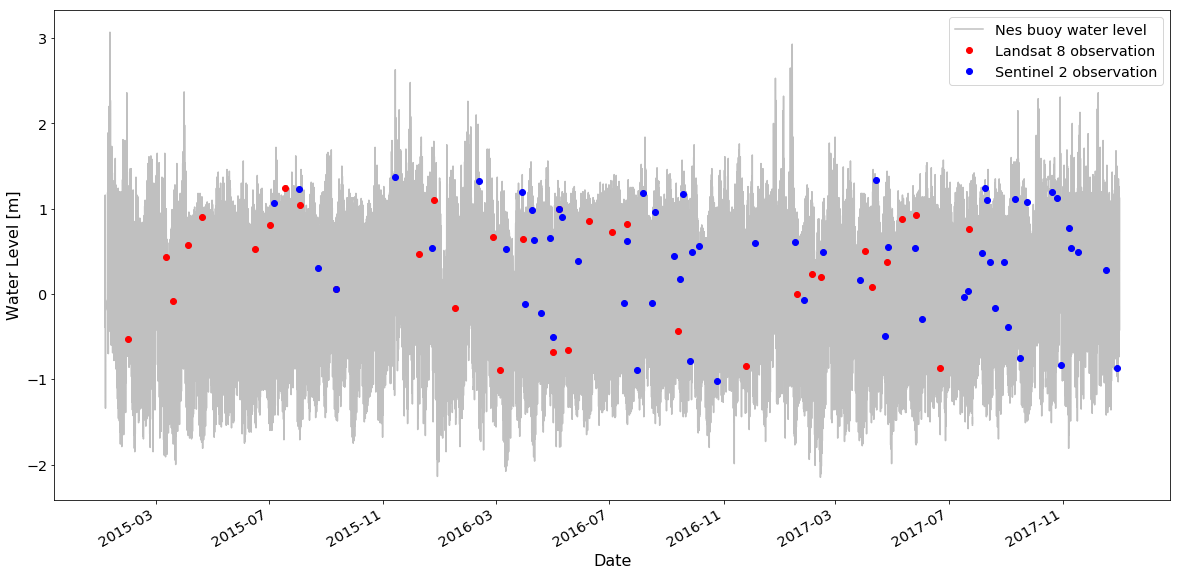